### sales reports for 12 months to analysis for the year 2019 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
##Data Base came in 12 seperate files so we concatenate them into 1 file

In [3]:
files = os.listdir('./data/')

In [4]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [5]:
All_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./data/' +file)
    All_data = pd.concat([df,All_data])

In [6]:
All_data.to_csv('Sales_combined.csv', index_label=False)

In [7]:
df = pd.read_csv('Sales_combined.csv')

# DATA WRANGLING!  

### Discovering the data and checking what needs to be cleaned.


In [8]:
df.head() #checking the database after the concatenation.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [9]:
df.info()  #some columns needs to change their Dtype to match its functionality! in data cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
df.isna().sum() # number of null values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# DATA CLEANING!

In [11]:
df.dropna(inplace=True) #dropping the null values

In [12]:
df.isna().sum() #checking again to make sure its clean

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
df.columns # Notice Space in the columns. will be replaced with '_'  for easire manipulations

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [14]:
df.columns = df.columns.str.replace(" ","_") 

In [15]:
df.head() #done perfect!

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [16]:
'''Found out there are "Str" located in columns that has numbers
which prevent me from converting the columns into (int) or (float)
had to search for those str and get rid of them
'''
df[df['Order_ID'] == 'Order ID']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
15280,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17208,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17324,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17339,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
df.duplicated().sum() # checking and dropping the duplicates

618

In [18]:
df.drop_duplicates(inplace =True)

In [19]:
df[df['Order_ID'] == 'Order ID']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [20]:
df.drop(index=1679, inplace =True)

In [21]:
df[df['Order_ID'] == 'Order ID'] # double check to make sure everything is cleaned!

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


In [22]:
df.head(1)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"


In [23]:
#converting the columns to ints and floats.
df.Order_ID = df.Order_ID.astype(int)
df.Quantity_Ordered = df.Quantity_Ordered.astype(int)
df.Price_Each = df.Price_Each.astype(float)

In [24]:
df.info() #checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185676 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185676 non-null  int32  
 1   Product           185676 non-null  object 
 2   Quantity_Ordered  185676 non-null  int32  
 3   Price_Each        185676 non-null  float64
 4   Order_Date        185676 non-null  object 
 5   Purchase_Address  185676 non-null  object 
dtypes: float64(1), int32(2), object(3)
memory usage: 8.5+ MB


In [25]:
df['Month'] = df['Order_Date'].str[0:2] #extracting a month from Order_Date to a different column!

In [26]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [27]:
df['Month'] = df['Month'].astype(int) #coverting into int  cuz the Order_Date was set to be object!

In [28]:
df.info() # done everything working perfect so far.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185676 entries, 0 to 18382
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185676 non-null  int32  
 1   Product           185676 non-null  object 
 2   Quantity_Ordered  185676 non-null  int32  
 3   Price_Each        185676 non-null  float64
 4   Order_Date        185676 non-null  object 
 5   Purchase_Address  185676 non-null  object 
 6   Month             185676 non-null  int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 9.2+ MB


In [29]:
#converting Order_Date into Date_time Dtype:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [30]:
df.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9


In [31]:
df['Total_price'] = df['Quantity_Ordered'] * df['Price_Each']   #creating a new column that has total price

In [32]:
df.head(1) # working well!

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_price
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36


In [33]:
df.head(1)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_price
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36


In [34]:
'''Creating two columns City and State!'''
df['City'] = df['Purchase_Address'].str.split(',').str[1] # one by apply string method
df['State'] =  df['Purchase_Address'].apply( lambda x:x.split(",")[2][0:3]) # by applying function.

In [35]:
df.head(1) #checking... seems working well!

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_price,City,State
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,CA


# EXPLORATORY DATA ANALYSIS

### What is the best month for sales? and how much was it ?

In [36]:
df.groupby('Month')['Total_price'].sum().nlargest()

Month
12    4608292.71
10    3734771.88
4     3389205.99
11    3197871.21
5     3150610.25
Name: Total_price, dtype: float64

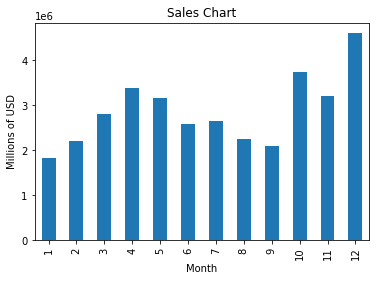

In [37]:
df.groupby('Month')['Total_price'].sum().plot(kind='bar')
plt.ylabel('Millions of USD')
plt.title('Sales Chart'); # visualizing in bar chart for better and quick understanding.

#### we can notice the Month( 12 ) December was the highest in 2019

## What city has the highest number of sales ?

In [38]:
df.groupby('City').sum()['Total_price'].nlargest(1)

City
 San Francisco    8254578.6
Name: Total_price, dtype: float64

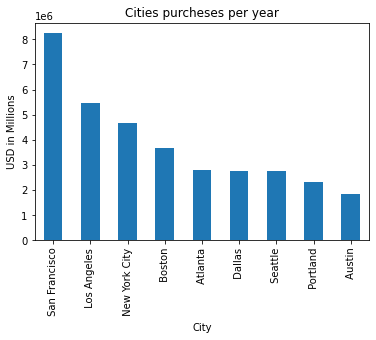

In [39]:
df.groupby('City').sum()['Total_price'].sort_values(ascending =False).plot(kind='bar')
plt.ylabel('USD in Millions')
plt.title('Cities purcheses per year');

#### San Francisco City was the highest City in purcheses in 2019 with (8,254,578.6)USD

## any relation between the number of Orders and times they were made in ?

In [40]:
df['Hour'] = df['Order_Date'].dt.hour
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_price,City,State,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,GA,19


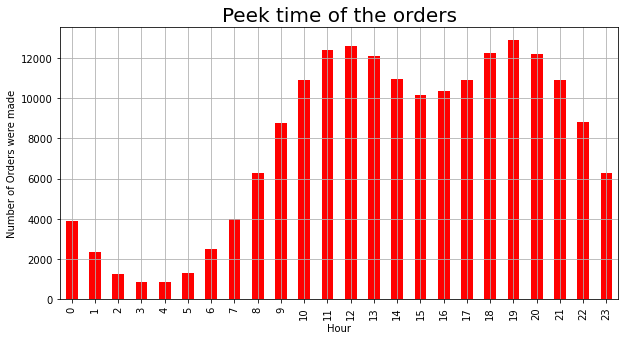

In [41]:
df.groupby('Hour').count()['Order_ID'].plot(kind='bar',ls='--', color ='red', figsize = (10,5))
plt.grid()
plt.ylabel('Number of Orders were made')
plt.title('Peek time of the orders',fontdict={'fontsize':'20'});

### we can notice that Peek hours for orders were made at  Hour 19,11 and Hour 12

In [42]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_price,City,State,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,GA,19
